<a href="https://colab.research.google.com/github/vaishnavi17398/FeynnLabsInternship/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Medication_Data_Kaggle_V1 (1).csv to Medication_Data_Kaggle_V1 (1).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("Medication_Data_Kaggle_V1 (1).csv")

In [4]:
# Drop unnecessary columns
df = df.drop(columns=['ID'])

In [5]:
# Group by Year and sum the medication usage
df_grouped = df.groupby('Year').sum()

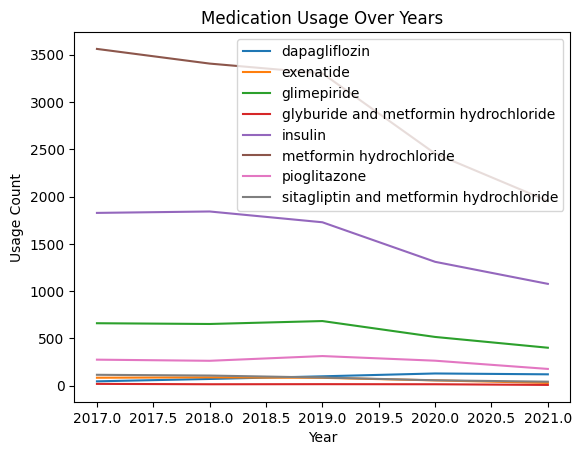

In [6]:
# Plotting medication usage over the years
df_grouped.plot(kind='line')
plt.title('Medication Usage Over Years')
plt.xlabel('Year')
plt.ylabel('Usage Count')
plt.show()

In [7]:
# Splitting data into training and testing sets
train_size = int(len(df_grouped) * 0.8)
train, test = df_grouped[:train_size], df_grouped[train_size:]


In [10]:
# Define and fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Selecting 'insulin' as the endogenous variable
endog_var = 'insulin'

# Group by Year and sum the medication usage
df_grouped = df.groupby('Year')[endog_var].sum()

# Fit SARIMAX model
model = SARIMAX(df_grouped, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [11]:
# Forecast
forecast = model_fit.forecast(steps=len(df_grouped))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [12]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df_grouped, forecast))
print('RMSE:', rmse)

RMSE: 570.2306550861678


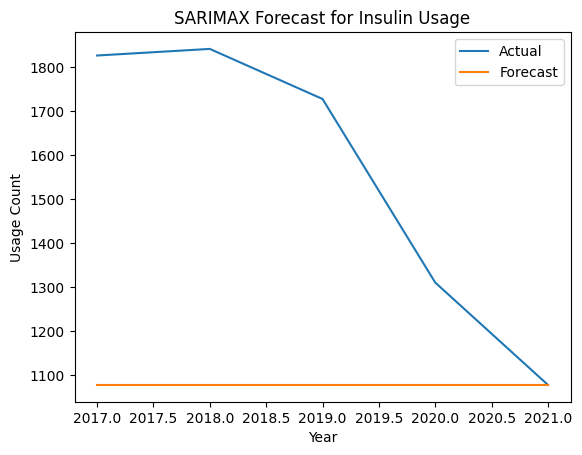

In [13]:
# Plotting
plt.plot(df_grouped.index, df_grouped.values, label='Actual')
plt.plot(df_grouped.index, forecast, label='Forecast')
plt.title('SARIMAX Forecast for Insulin Usage')
plt.xlabel('Year')
plt.ylabel('Usage Count')
plt.legend()
plt.show()

To design a financial equation corresponding to the market trend observed in the medication usage dataset, we need to establish a relationship between the medication usage and its financial implications. Depending on the context and available data, we can create a simple financial equation that captures the revenue or cost associated with medication usage.

In [14]:
Let's consider two scenarios:

Revenue Equation:

In this scenario, we assume that each unit of medication usage generates revenue. This could represent sales revenue for pharmaceutical companies or revenue for healthcare providers.

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-14-33a0fea9e674>, line 1)

Let's consider two scenarios:

Revenue Equation:

In this scenario, we assume that each unit of medication usage generates revenue. This could represent sales revenue for pharmaceutical companies or revenue for healthcare providers.

Total Revenue=∑i=1 to n(Price ×Usage)
Where:
n is the number of different medications.
Price

Cost Equation:

Alternatively, we can assume that each unit of medication usage represents a cost. This could represent expenses incurred for purchasing medications or healthcare costs associated with treatment.
Total Cost=∑(Cost*Usage)

These equations provide a framework for estimating the financial impact of medication usage based on the price or cost per unit of medication and the usage count over a specific period.